In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

    
from misc_utils import load_raw_responses_with_traces,load_random_trace_sample
from session_and_tree_utils import *  


from response_distributions_util import plot_metric, get_single_motivation, plot_metric_breakdowns
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scipy  
  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = load_raw_responses_with_traces()
df = get_sessions_and_trees(df)
df['single motivation'] = df['motivation'].apply(get_single_motivation)

In [ ]:
df = df.apply(get_click_session, axis=1)
df['click_forest'] = df['click_session'].apply(getMinimumSpanningForest)
df = df.apply(get_click_tree, axis=1)

# Click Session Metrics

### Num Pageviews 

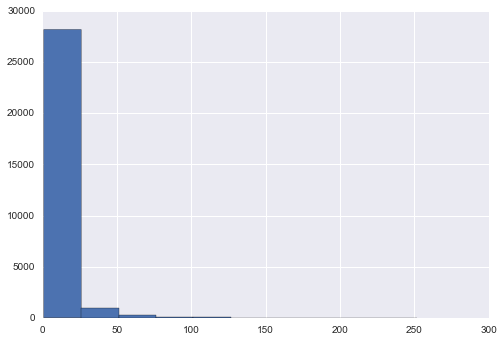

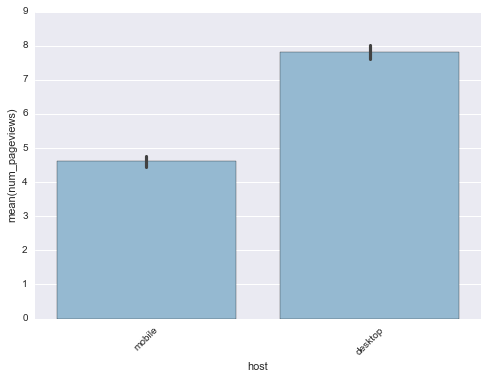

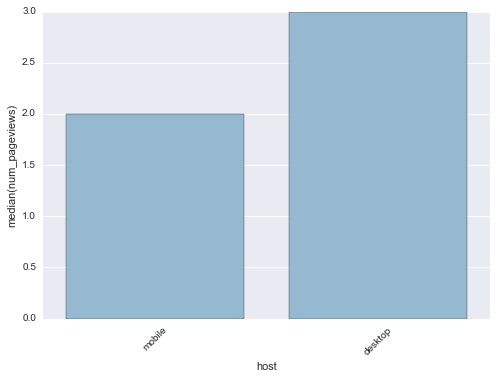

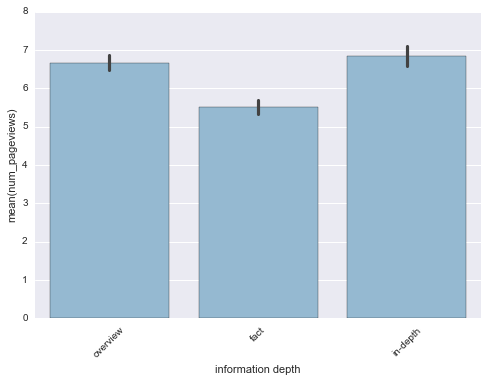

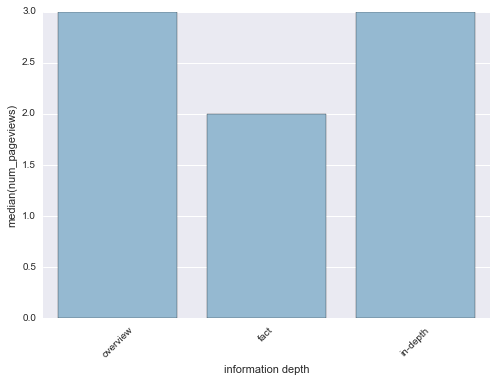

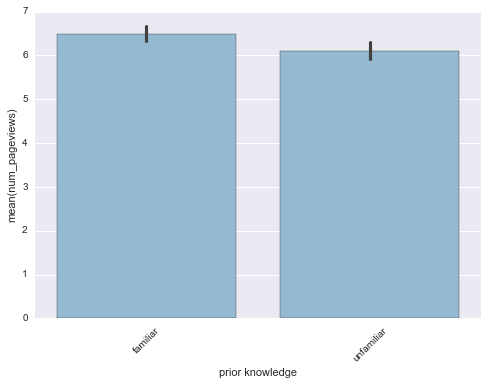

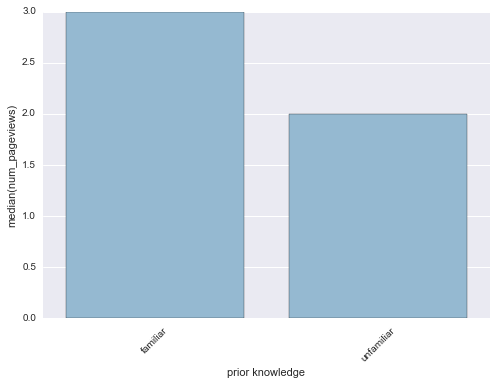

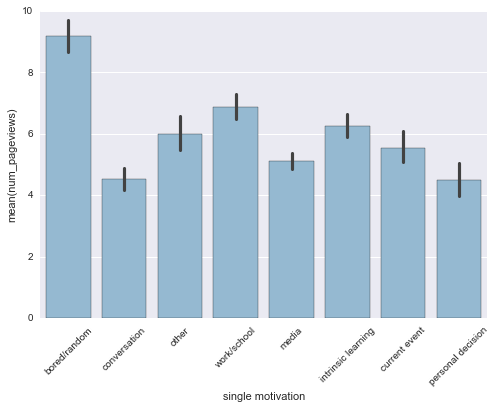

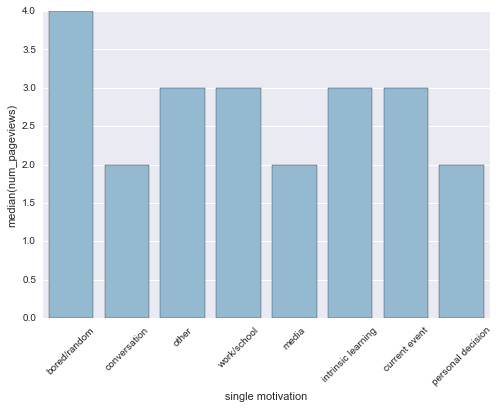

In [3]:
metric = 'num_pageviews'
df[metric] = df['click_session'].apply(num_pageviews)
plot_metric_breakdowns(df, metric)

### Session Length (Time)

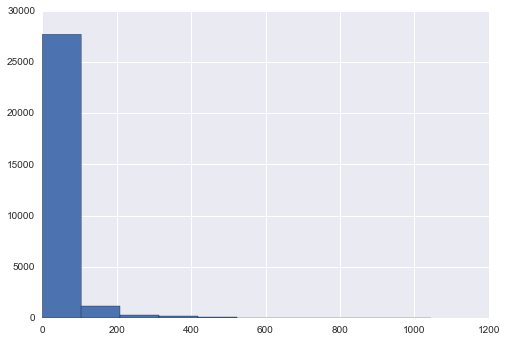

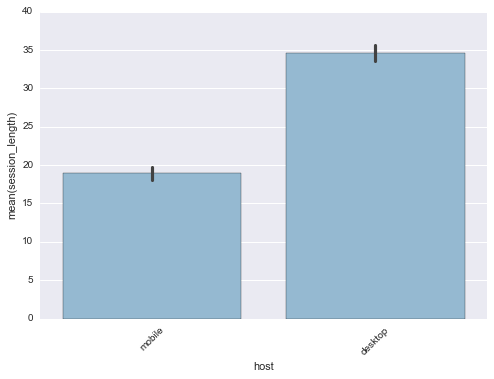

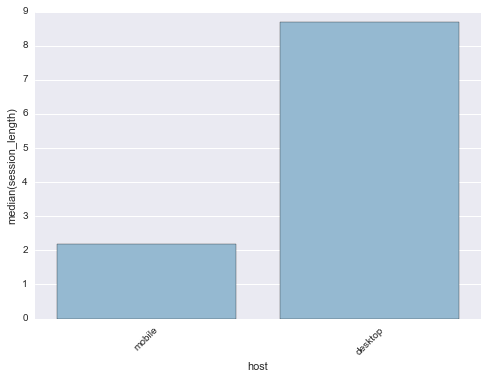

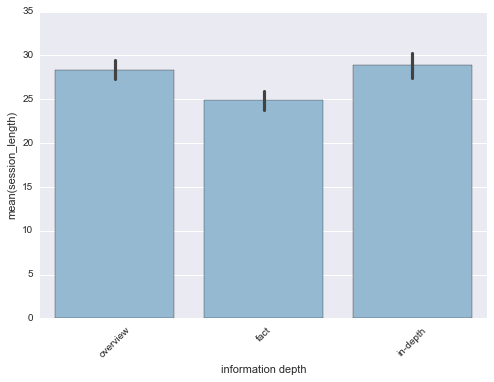

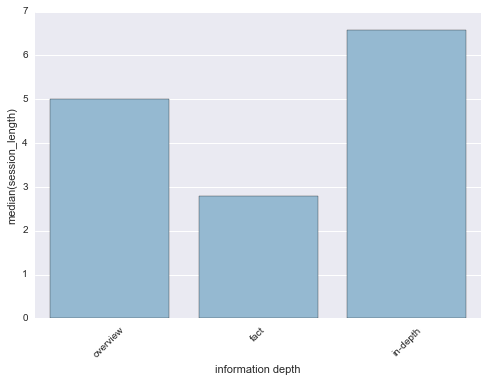

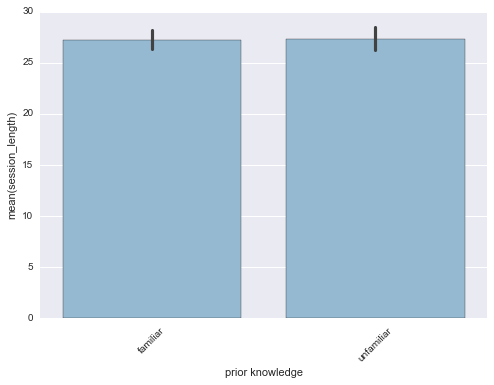

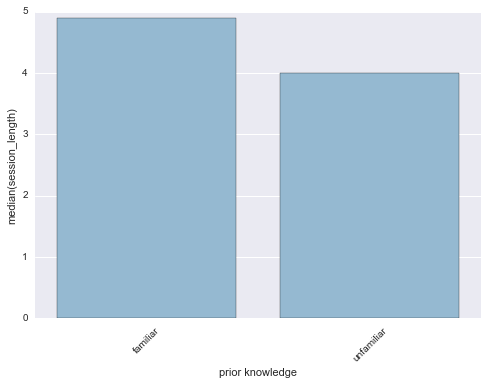

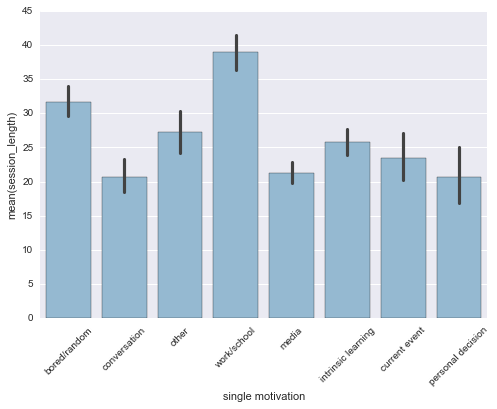

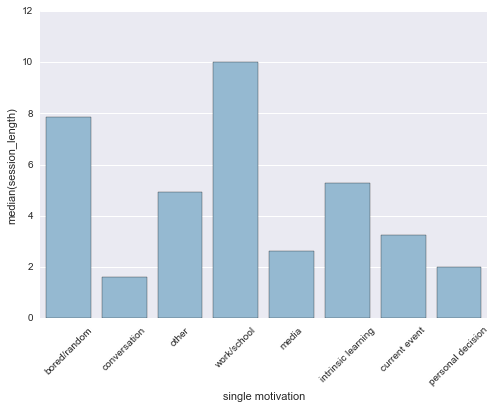

In [4]:
metric = 'session_length'
df[metric] = df['click_session'].apply(get_session_length)
plot_metric_breakdowns(df, metric)

### Search

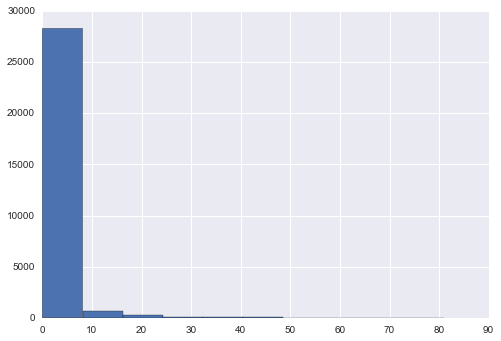

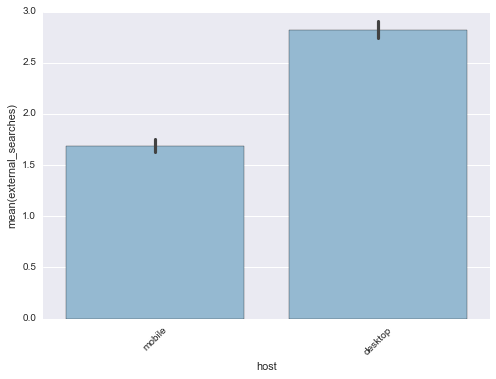

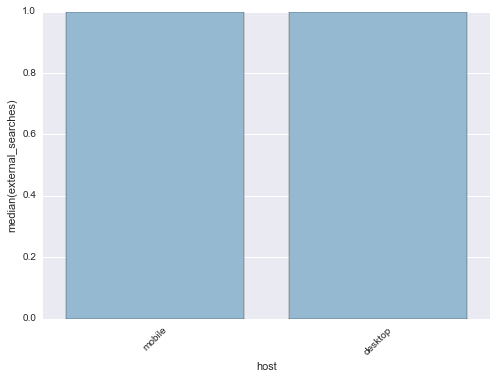

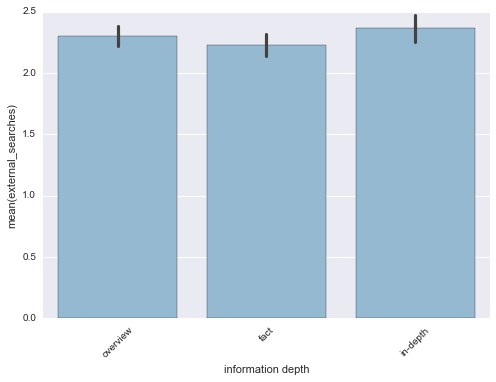

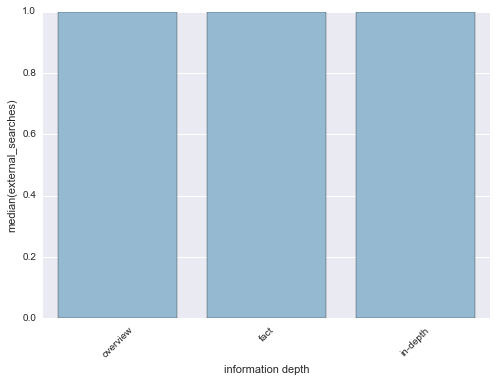

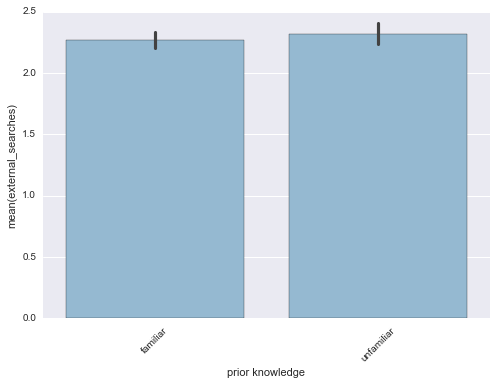

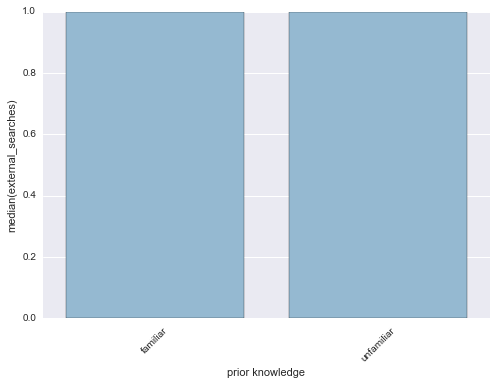

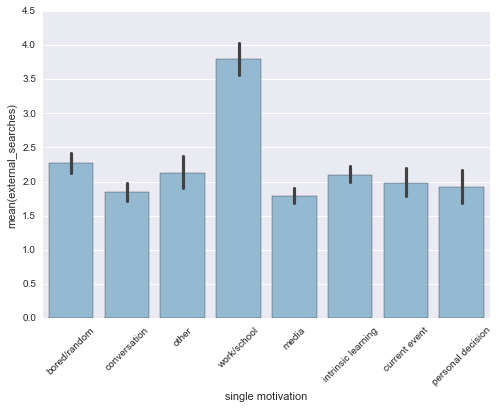

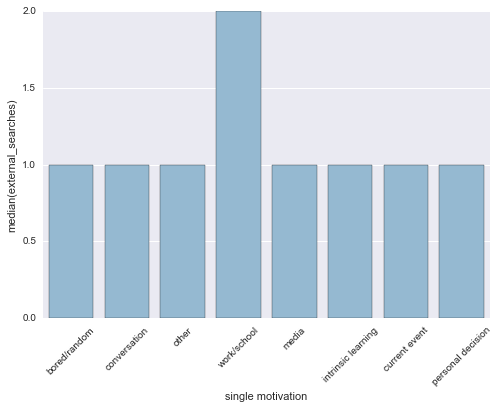

In [5]:
metric = 'external_searches'
df[metric] = df['click_session'].apply(external_searches)

plot_metric_breakdowns(df, metric)

# Click Tree Metrics

- size: # of nodes in tree
- num_leafs: num_leafs
- mean_time_diff: mean time between parent and child requests
- degree_max: max # of children of any node in the tree
- depth_max: tree depth

In [6]:
from ml_utils import get_tree_metrics

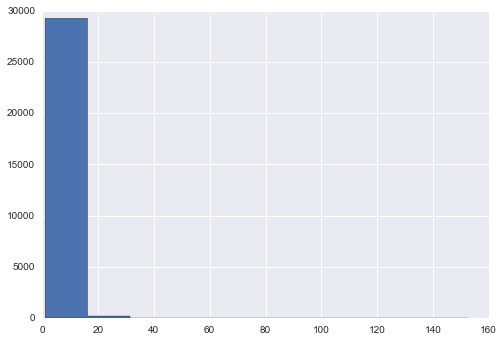

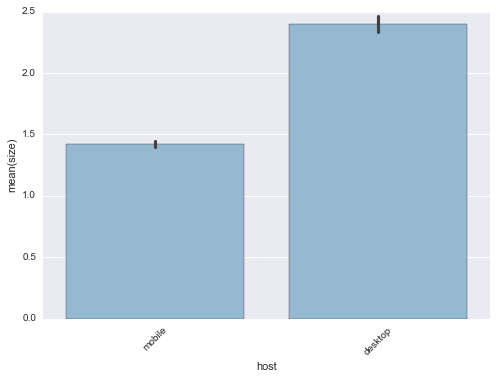

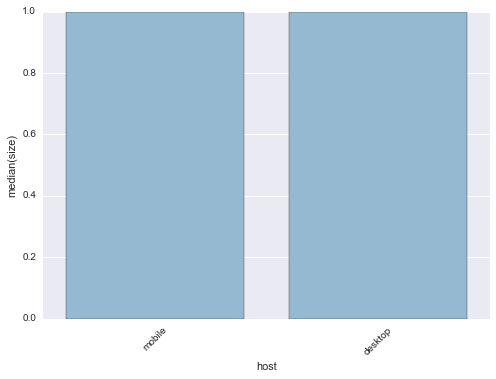

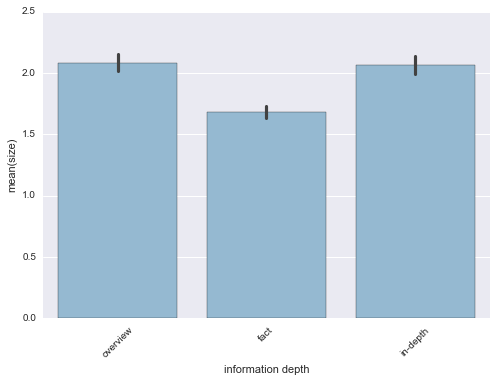

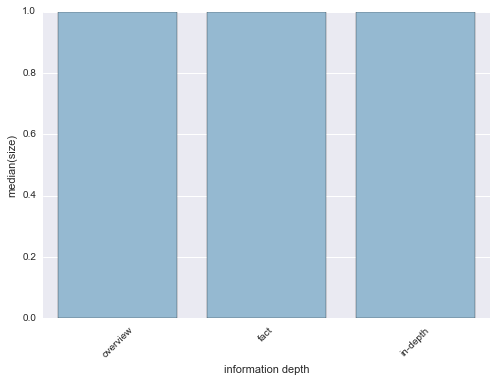

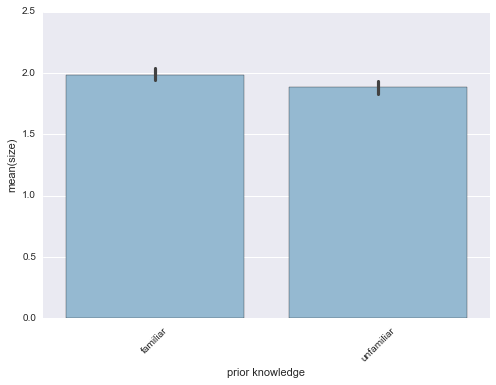

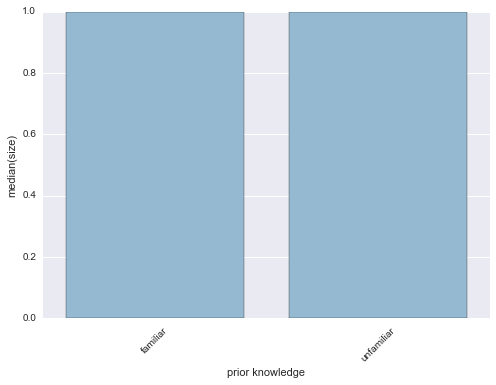

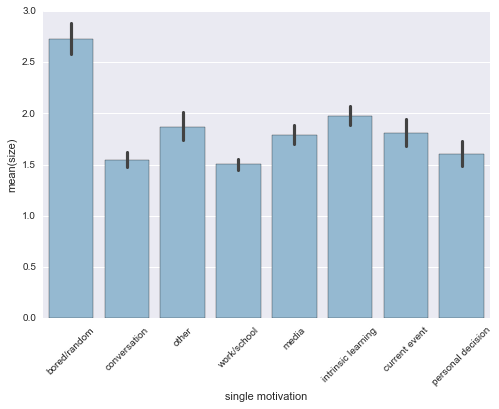

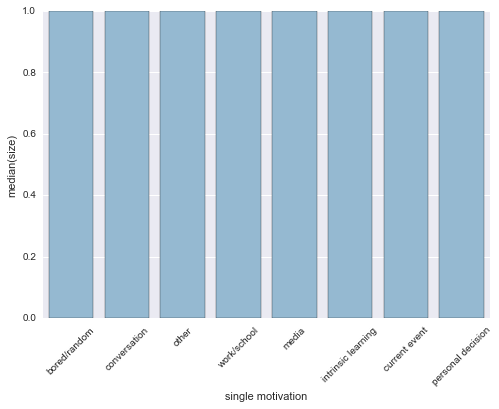

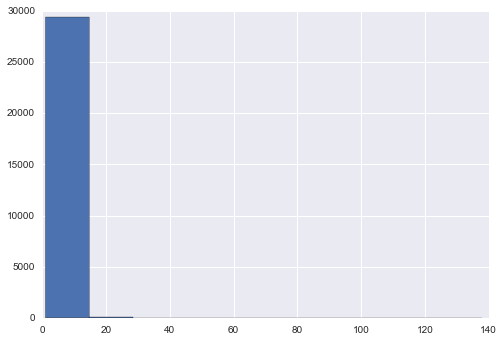

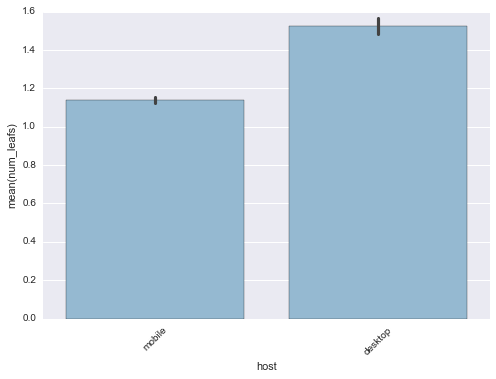

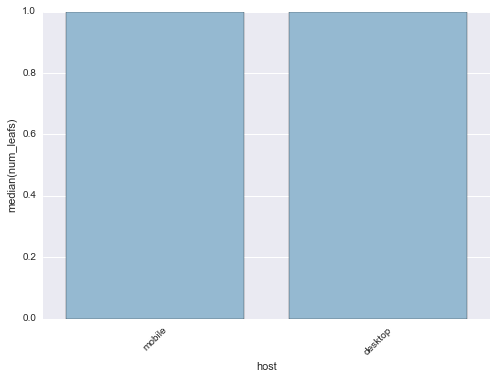

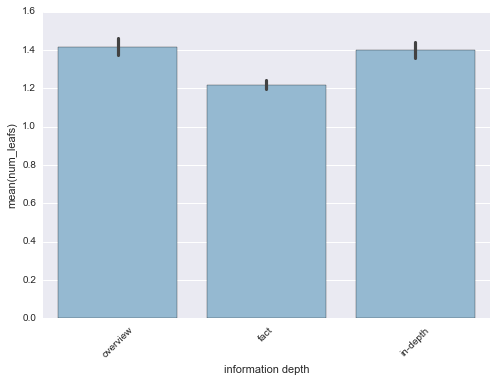

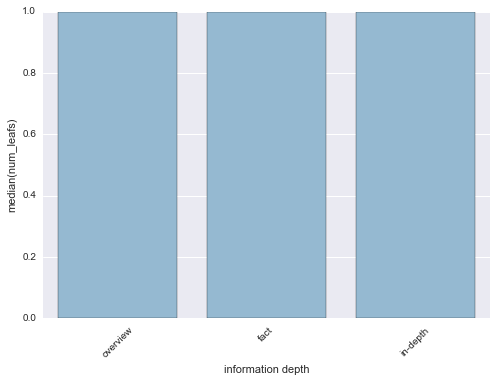

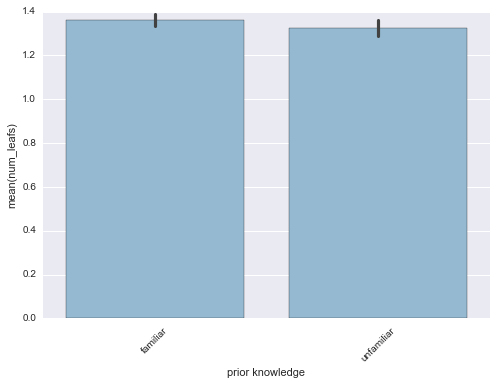

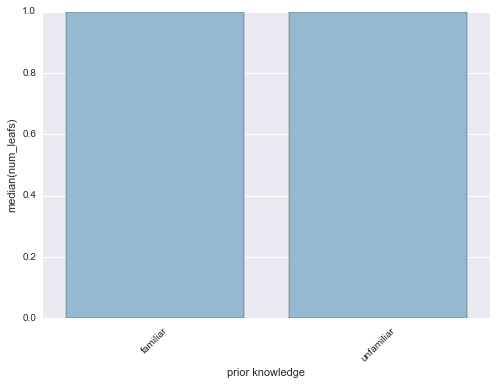

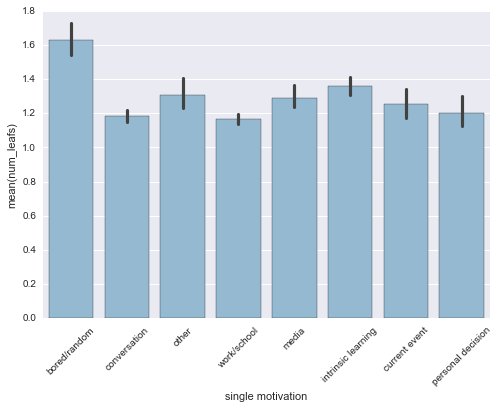

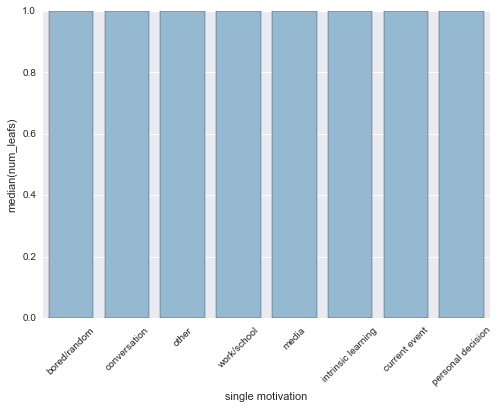

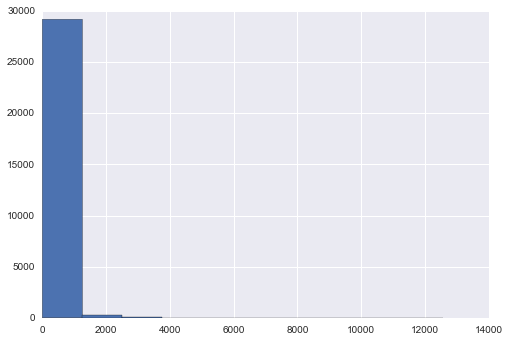

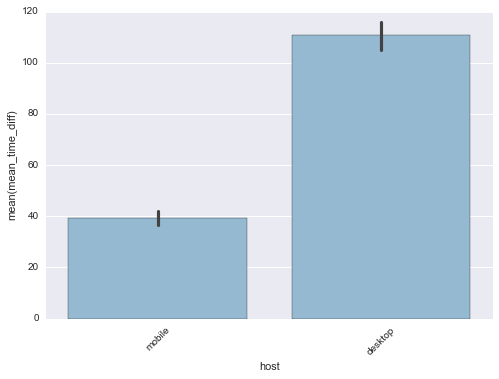

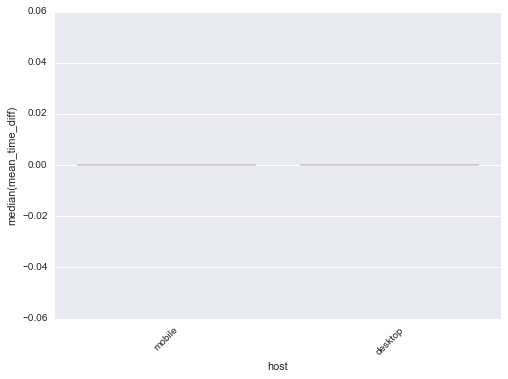

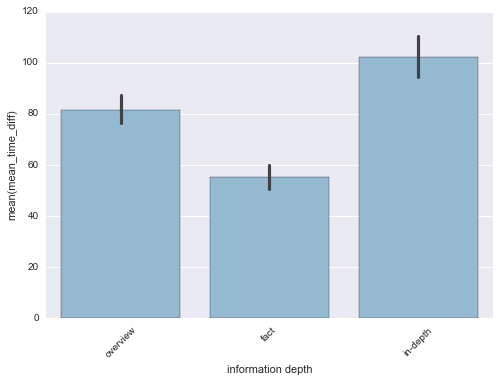

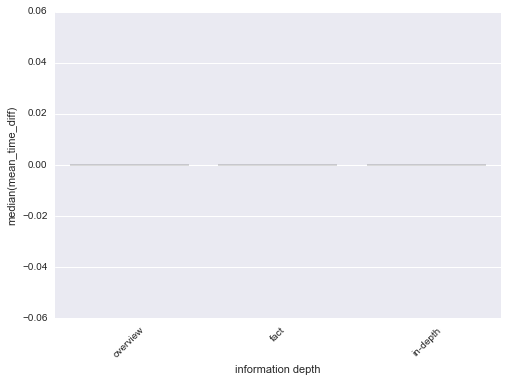

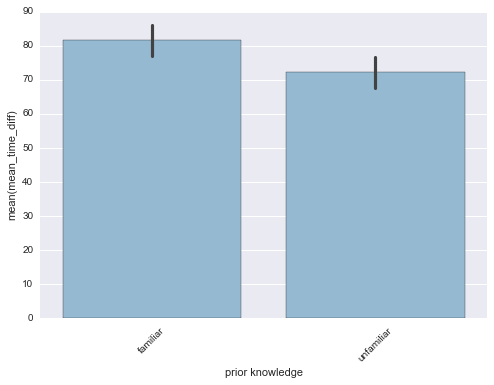

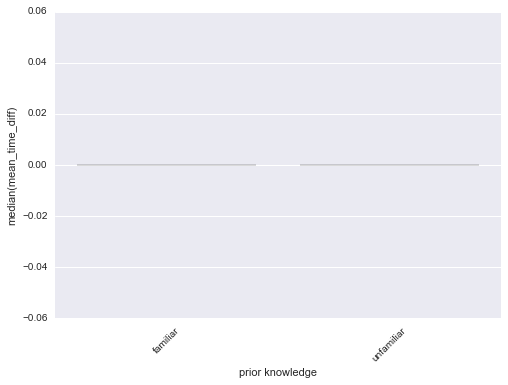

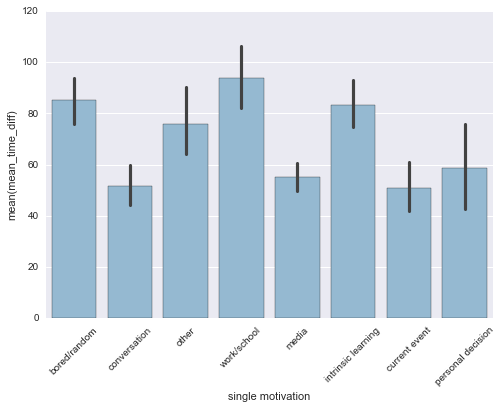

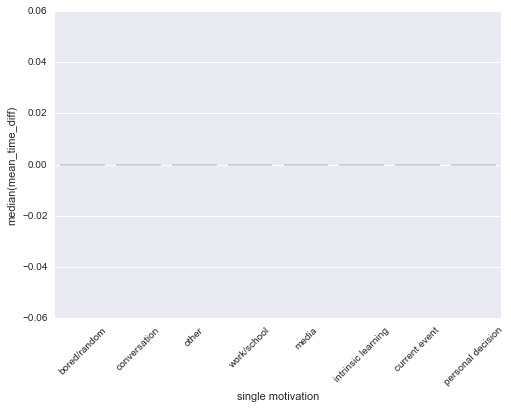

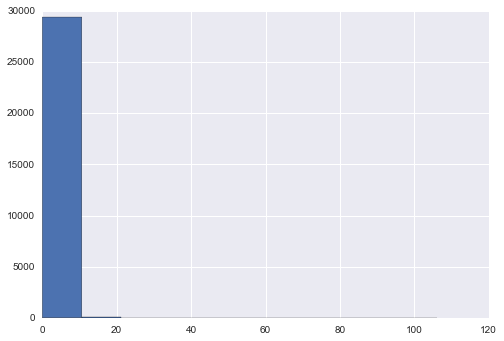

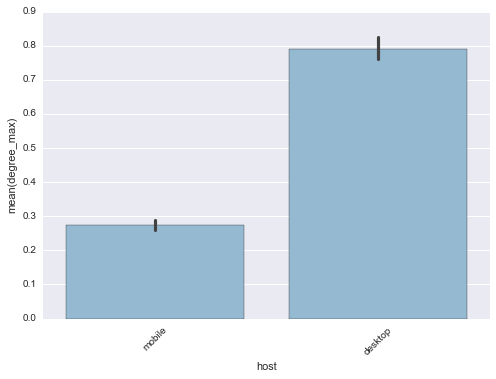

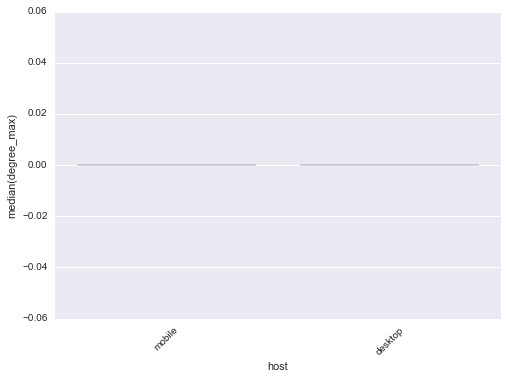

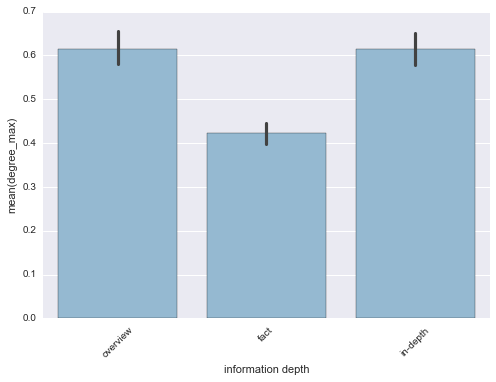

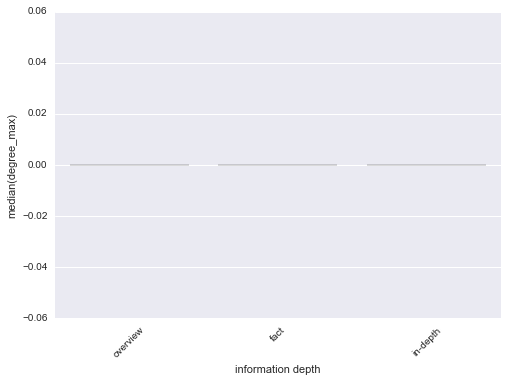

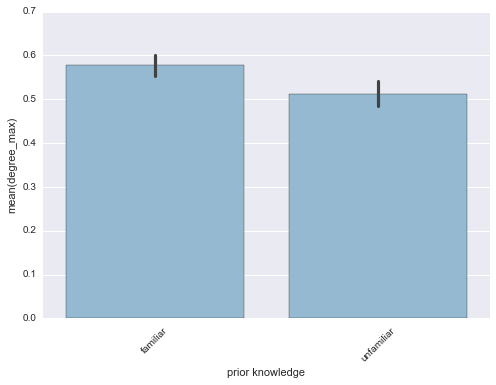

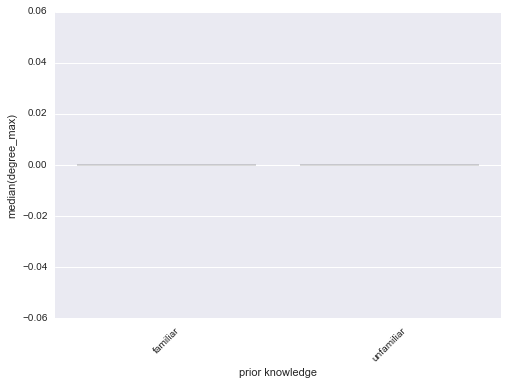

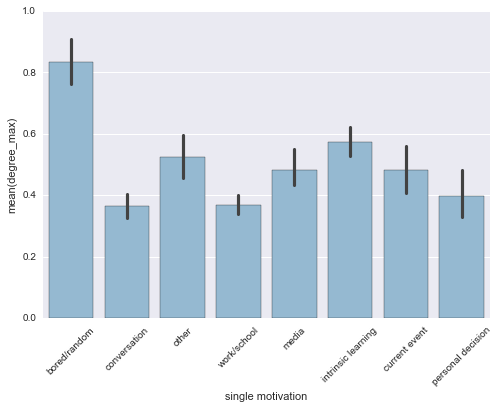

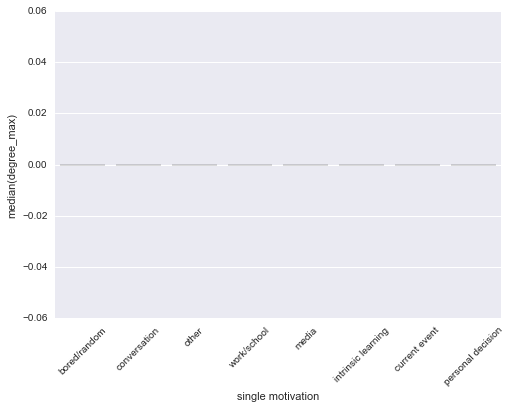

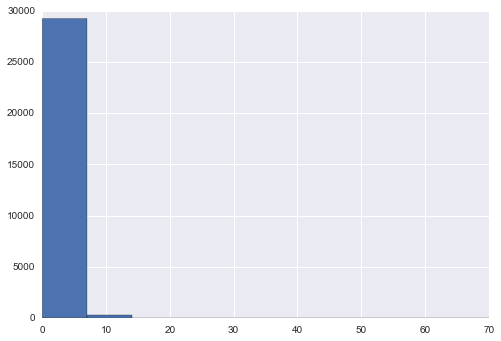

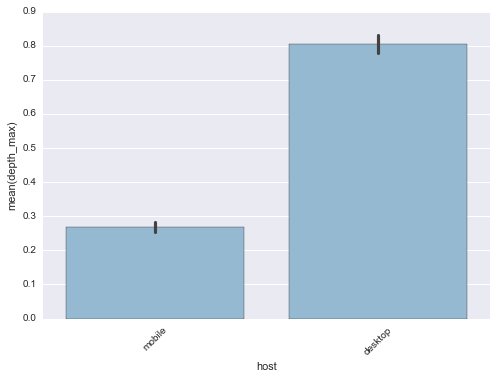

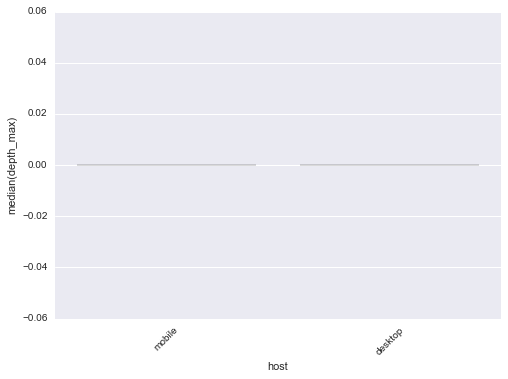

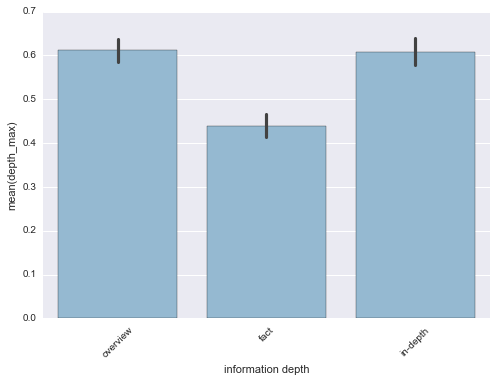

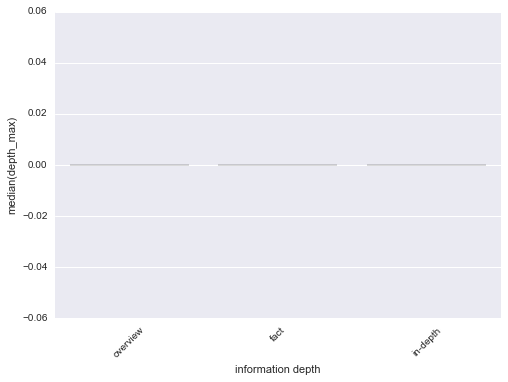

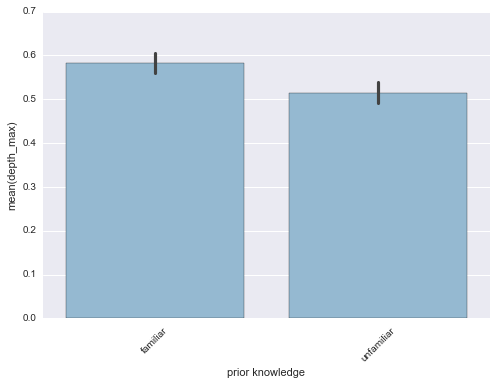

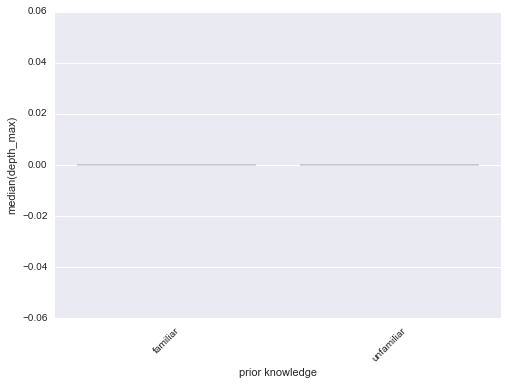

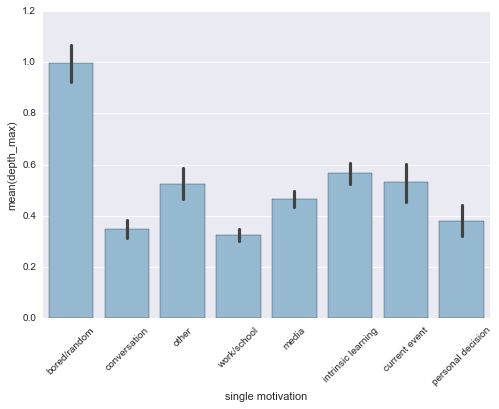

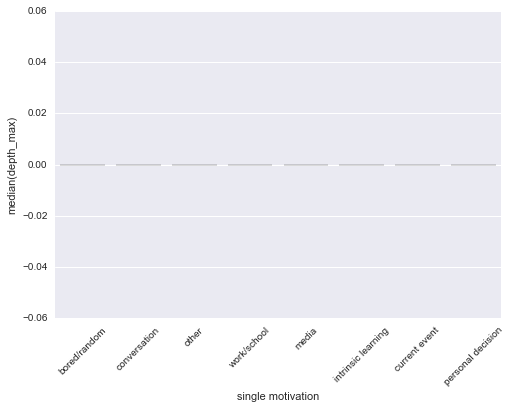

In [7]:
tree_metrics = ['size', 'num_leafs', 'mean_time_diff' , 'degree_max' , 'depth_max']

for m in tree_metrics:
    df[m] = df['click_tree'].apply(lambda x: get_tree_metrics(x)[m])
    plot_metric_breakdowns(df, m)